方程中未知量是函数而不是变量，且未知量涉及未知函数的导数的方程称为微分方程。常微分方程（ordinary differential equation,  ODE）是一类特殊情况，未知函数只有一个独立变量，方程中存在未知函数的导数。另一方面，如果方程中存在多个变量的导数，则被称为偏微分方程。这里我们关注的是常微分方程(在下面缩写为 ODE)，探索求解这类方程的符号方法和数值方法。ODE 的解析闭合解通常不存在，但对于许多特殊类型的 ODE，存在解析解，在这些情况下，我们有机会使用符号方法找到解。如果不行，我们必须像往常一样采用数值技术求解。

常微分方程在科学和工程以及许多其他领域中普遍存在（例如，它们出现在动力学系统的研究中）。ODE 的一个典型例子是描述时间演化过程，其中变化的速率（导数）与过程的其它属性有关。为了了解在给定一些初始状态后，过程在时间上是如何演变的，我们必须求解，或积分描述该过程的 ODE。常微分方程应用的具体例子有：物理学中机械运动的规律、化学和生物学中的分子反应以及生态学中的种群模型。

在本章中，我们将探讨解 ODE 的符号方法和数值方法。对于符号方法，我们使用 `SymPy` 模块，对于数值积分，我们使用 `SciPy` 中积分模块的函数。

# 常微分方程

常微分方程最简单的形式是 $\frac{dy(x)}{dx}=f(x, y(x))$，其中 $y(x)$ 是未知函数，$f(x, y(x))$ 是已知的。由于 $y(x)$ 的导数出现在方程中，所以这是一个微分方程。又由于方程中只出现了一阶导数，因此它是一阶 ODE。更一般地说，我们可以将第 $n$ 阶 ODE 显式地写成 $\frac{d^ny}{dx^n} = f(x, y, \frac{dy}{dx}, ... , \frac{d^{n-1}y}{dx^{n-1}})$，或者以隐式地写成 $F(x, y, \frac{dy}{dx}, ... , \frac{d^ny}{dx^n})$，其中 $f$ 和 $F$ 是已知函数。

一阶 ODE 的一个例子是牛顿冷却定律（*Newton's law of cooling*）$\frac{dT(t)}{dt} = -k(T(t) - T_a)$，它描述了环境温度为 $T_a$，则物体温度为 $T(t)$。该 ODE 的解是 $T(t) = T_a + (T_0 - T_a)e^{-kt}$，其中 $T_0$ 是物体的初始温度。二阶 ODE 的一个例子是牛顿第二运动定律（*Newton's second law of motion*）$F = ma$，或者更明确的是 $F(x(t)) = m \frac{d^2x(t)}{dt^2}$。这个方程描述了当受到位置相关（*position-dependent*）的力 $F(x(t))$ 时，质量为 $m$ 的物体的位置为 $x(t)$。为了完全的给出这个 ODE 的解，我们除了找到它的一般解之外，还必须给出对象的初始位置和速度。同理，$n$ 阶 ODE 的一般解有 $n$ 个自由参数，我们需要给出未知函数的初始条件和其 $n-1$ 个导数。

ODE 总是可以重写为一阶常微分方程组。具体而言 $n$ 阶 ODE $\frac{d^ny}{dx^n} = g(x, y, \frac{dy}{dx},...,\frac{d^{n-1}y}{dx^{n-1}})$，可以通过引入 $n$ 个新函数以标准形式显式地写为 $y_1 = y, y_2 = \frac{dy}{dx}, ..., y_n = \frac{d^{n-1}y}{dx^{n-1}}$。这给出了以下一阶常微分方程组：

$$
\frac{d}{d x}\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n-1} \\
y_{n}
\end{array}\right]=\left[\begin{array}{c}
y_{2} \\
y_{3} \\
\vdots \\
y_{n} \\
g\left(x, y_{1}, \ldots, y_{n}\right)
\end{array}\right]
$$
它也可以写成更紧凑的向量形式：$\frac{d}{dx} y(x) = f(x, y(x))$这个规范形式对于 ODE 的数值解尤其有用，且常见的求解 ODE 的数值方法需要函数 $f = (f_1, f_2, ..., f_n)$ （本例是 $f=(y_2, y_3, ..., g)$）作为输入变量。如，牛顿第二运动定律的二阶 ODE $F(x) = m \frac{d^2x}{dt^2}$可以写成标准形式 $y = [y_1=x, y_2 = \frac{dx}{dt}]^T$，给定 $\frac{d}{dt} \begin{bmatrix} y_1 \\ y_2\end{bmatrix} = \begin{bmatrix} y_2 \\ F(y_1)/m \end{bmatrix}$。

如果函数 $f_1, f_2, ..., f_n$ 都是线性的，则相应的 ODE 组可以写成简单形式 $\frac{dy}{dt} = A(x)y(x) + r(x)$，其中 $A(x)$ 是一个 $n \times n$ 矩阵，而 $r(x)$ 是一个仅依赖于 $x$ 的 $n$ 维向量。在这种形式中，$r(x)$ 被称为源项，如果 $r(x) = 0$，则线性系统齐次，否则非齐次。线性常微分方程是可解（如，使用 $A(x)$ 的特征值分解）的重要特例。同样，对于具有某些属性或形式的函数 $f(x, y(x))$，除了近似数值方法外，可能有已知解或特殊方法来解相应的问题，但是对于一般的 $f(x, y(x))$ 没有通用方法。

除了函数 $f(x, y(x))$ 的性质影响 ODE 问题的可解性，ODE 的边界条件也会影响。需要边界条件来确定出现在解中的积分常数的值。ODE 问题的边界条件主要有两种类型：初值条件（*initial value conditions*）和边值条件（*boundary value conditions*）。对于初值问题，函数及其导数的值在起点给出，问题是自变量从起点向前演化函数。对于边值问题，未知函数及其导数的值在不动点给出，这些不动点通常是感兴趣域的终点。

## 符号求解 ODE

`SymPy` 提供了一个通用的 ODE 求解工具 `sympy.dsolve`，它能够找到许多基本 ODE 的解析解。 `sympy.dsolve` 函数会尝试自动对给定的 ODE 进行分类，尝试使用各种技术来求解给定 ODE。我们可以给 `dsolve` 函数一些提示，这可以引导它到最合适的求解方法。虽然 `dsolve` 可以用来符号化地求解许多简单的 ODE，但我们将在后面看到（值得记住的是）大多数 ODE 不能解析地求解。 ODE 符号解的典型例子是一阶或二阶 ODE 的求解，以及具有较少未知函数的一阶线性常微分方程的求解。如果 ODE 具有特殊的对称性，或其他特性，如可分离、具有常数系数或存在已知解析解的特殊形式，则它也有很大帮助。虽然这些 ODE 类型是例外情况和特殊情况，但这些 ODE 有许多重要的应用，对于这些情况，`SymPy` 的 `dsolve` 可能是对传统分析方法的非常有用的补充。在本节中，我们将探讨如何使用 `SymPy` 及其 `dsolve` 函数来解简单但常见的 ODE。

为了说明用 `SymPy` 求解 ODE 的方法，我们从最简单的问题开始，然后，逐步研究更复杂的情况。第一个例子是简单的一阶 ODE： 牛顿冷却定律，$\frac{dT(t)}{dt} = -k(T(t) - T_a)$，初值为 $T(0) = T_0$。

为了用 `SymPy` 解决这个问题，我们首先需要为变量 $t, k, T_0, T_a$ 定义符号，并且为了表示未知函数 $T(t)$，我们可以使用 `sympy.Function` 对象：


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

sympy.init_printing()  # 初始化其屏幕打印系统


In [2]:
t, k, T0, Ta = sympy.symbols('t, k, T_0, T_a')
T = sympy.Function('T')

接下来，我们可以非常自然地定义 ODE，只需在 ODE 的左侧创建一个 `SymPy` 表达式（当将公式写成 $\frac{dT(t)}{dt} + k(T(t) - T_a) = 0$ 的形式时）。这里，为了表示函数 $T(t)$，我们可以使用 `Sympy` 函数对象 $T$。使用函数调用语法 $T(t)$，将符号 $t$ 应用于它，会产生一个应用的函数对象，我们可以使用 `sympy.diff` 或 `diff` 方法对 $T(t)$ 表达式进行求导：

In [3]:
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode, 0)

这里，我们使用 `sympy.Eq` 来显示包含等号且右边为零的方程。鉴于 ODE 的这种表示，我们可以直接将它传递给 `sympy.dsolve`，它将尝试自动查找 ODE 的一般解。

In [4]:
ode_sol = sympy.dsolve(ode)
ode_sol

对于该 ODE，`sympy.dsolve` 函数的确找到了一般解，它包含一个未知的积分常数 $C_1$，我们必须从问题的初始条件中确定它。`sympy.dsolve` 的返回值是 `sympy.Eq` 的一个实例，它是等式的符号表示。它具有用于访问等式对象的左侧和右侧的属性`lhs` 和 `rhs`：

In [5]:
ode_sol.lhs

In [6]:
ode_sol.rhs

一旦找到一般解，我们需要使用初始条件来找到尚未确定的积分常量的值。这里的初始条件是 $T(0) = T_0$。为此，我们首先创建一个描述初始条件的字典，$ics = \{T(0): T_0\}$，我们可以使用 `SymPy` 的 `subs` 方法以及初始条件字典来将初始条件应用到 ODE 的解。这将产生未知积分常数 $C_1$ 的方程：

In [7]:
ics = {T(0): T0}
C_eq = sympy.Eq(ode_sol.lhs.subs(t, 0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

在本例中，$C_1$ 的等式很容易求解，但为了通用性，我们使用 `sympy.solve` 解决它。结果是一个解的列表（在本例中是一个仅有一个解的列表）。我们可以将 $C_1$ 的解代入 ODE 的一般解，以获得与给定初始条件相对应的特解：

In [8]:
C_sol = sympy.solve(C_eq)
C_sol

In [9]:
ode_sol.subs(C_sol[0])

通过执行这些步骤，我们完全符号化地解了 ODE 问题，并且获得解 $T(t) = T_a + (T_0 - T_a)e^{-kt}$。此过程涉及的步骤很简单，但应用初始条件和求解未确定的积分常量可能会稍微繁琐，值得在可重用的函数中执行这些步骤。以下函数 `apply_ics` 是将这些步骤推广到任意阶微分方程的基本实现。

In [10]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
    to the solution of the ODE with independent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """

    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)

    return sol.subs(sol_params)

利用这个函数，我们可以更方便地挑出一个满足一组初始条件 ODE 的特解，给定相同 ODE 的一般解。对于前面的示例，我们有：

In [11]:
ode_sol

In [12]:
apply_ics(ode_sol, ics, t, [k, Ta])

到目前为止，我们所看的例子几乎是微不足道的，但同样的方法可以用来处理任何 ODE 问题，尽管当然不能保证会找到一个解。作为稍微复杂一些的问题的例子，考虑阻尼谐振子的 ODE，它是形式为 $\frac{d^2x(t)}{dx^2} + 2\gamma \omega_0 \frac{dx(t)}{dt} + \omega_0^2x(t) = 0$ 的二阶 ODE，其中 $x(t)$ 是振荡器在 $t$ 时刻的位置，$\omega_0$ 是无阻尼情况的频率，$\gamma$ 是阻尼比。我们首先定义所需的符号并构造 ODE，然后通过调用 `sympy.dsolve` 来找到一般解：

In [13]:
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)
x = sympy.Function('x')
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0 ** 2 * x(t)

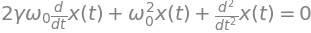

In [14]:
sympy.Eq(ode,0)

In [15]:
ode_sol = sympy.dsolve(ode)
ode_sol

由于这是一个二阶 ODE，因此在通用解中有两个待定积分常数。我们需要为位置 $x(0)$ 和速度 $\frac{dx(t)}{dt}\Bigr|_{t=0}$ 指定初始条件，以便为 ODE 指定一个特解。为此，创建一个包含这些初始条件的字典，并使用 `apply_ics` 将其应用于 ODE 解：

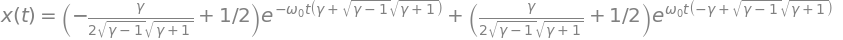

In [16]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

这是具有初始条件 $x(0) = 1, \quad \frac{dx(t)}{dt}\Bigr|_{t=0} = 0$ 振荡器对任意 $t, \quad \omega_0, \quad \gamma$ 的动力学解。然而，将对应于临界阻尼的 $\gamma = 1$ 直接代入该表达式会导致 `division by zero` 错误，对于 $\gamma$ 的这种特殊选择，我们需要小心并计算 $\gamma \to 1$ 时的极限。